# Market Basket Analysis and Customer Clustering
--------------------------------------

## Introduction
---
In this analysis, I explored customer data from a retail company to extract valuable insights into customer behavior. Our primary objective is to support the company in making informed decisions for future campaigns, pinpointing target audiences for new products, and prioritising their most valuable customers.The dataset utilized in this analysis is a publicly available Kaggle dataset, featuring the following variables:

#### People
- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in the customer's household
- **Teenhome:** Number of teenagers in the customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since the customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- **MntWines:** Amount spent on wine in the last 2 years
- **MntFruits:** Amount spent on fruits in the last 2 years
- **MntMeatProducts:** Amount spent on meat in the last 2 years
- **MntFishProducts:** Amount spent on fish in the last 2 years
- **MntSweetProducts:** Amount spent on sweets in the last 2 years
- **MntGoldProds:** Amount spent on gold in the last 2 years

#### Promotion
- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if the customer accepted the offer in the last campaign, 0 otherwise

#### Place
- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalog
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to the company’s website in the last month



## Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning & Feature Engineering
---

In [5]:
# Read the dataset
df_retail = pd.read_csv('/Users/azi/Documents/Projects/Market Basket Analysis and Customer Clustering/marketing_campaign.csv', sep = '\t')

In [6]:
# Renaming columns
df_retail.columns = ['customer_id','year_birth', 'education','marital_status','income', 'kid_home','teen_home','dt_customer','recency', 'mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish','mtn_sweet','mnt_gold','num_deals_purchases','num_web_purchases','num_catalog_purchases','num_store_purchases','num_web_visits_month','accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1', 'accepted_cpm2', 'conplain','z_cost_contact', 'z_revenue', 'response']

# Overview the first few rows of the data
df_retail.head()

,customer_id,year_birth,education,marital_status,income,kid_home,teen_home,dt_customer,recency,mnt_wines,...,num_web_visits_month,accepted_cpm3,accepted_cpm4,accepted_cpm5,accepted_cpm1,accepted_cpm2,conplain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
# Displaying the shape of the dataset
display(df_retail.shape)

(2240, 29)

In [8]:
# Display the count of missing values (NaN) in each column of the DataFrame 'df_retail'.
display(df_retail.isnull().sum())

customer_id               0
year_birth                0
education                 0
marital_status            0
income                   24
kid_home                  0
teen_home                 0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat                  0
mnt_fish                  0
mtn_sweet                 0
mnt_gold                  0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cpm3             0
accepted_cpm4             0
accepted_cpm5             0
accepted_cpm1             0
accepted_cpm2             0
conplain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

## Remove Missing Values
---

In [9]:
# Replace missing values(NaN) with the mean value
df_imputed = df_retail.fillna(df_retail['income'].mean())

In [10]:
# Verifies that the sum of missing values across all columns is equal to zero
display(df_imputed.isnull().sum())

customer_id              0
year_birth               0
education                0
marital_status           0
income                   0
kid_home                 0
teen_home                0
dt_customer              0
recency                  0
mnt_wines                0
mnt_fruits               0
mnt_meat                 0
mnt_fish                 0
mtn_sweet                0
mnt_gold                 0
num_deals_purchases      0
num_web_purchases        0
num_catalog_purchases    0
num_store_purchases      0
num_web_visits_month     0
accepted_cpm3            0
accepted_cpm4            0
accepted_cpm5            0
accepted_cpm1            0
accepted_cpm2            0
conplain                 0
z_cost_contact           0
z_revenue                0
response                 0
dtype: int64

## Feature Engineering
---

In [11]:
# Create a feature with the total spent for the client
df_imputed['total_spent'] = df_imputed['mnt_wines']  + df_imputed['mnt_fruits'] + df_imputed['mnt_meat'] + df_imputed['mnt_fish'] + df_imputed['mtn_sweet'] + df_imputed['mnt_gold']

# Create a feature with the % of money spent on essential item (food-related) 
df_imputed['pct_essentials'] = (df_imputed['mnt_fruits'] + df_imputed['mnt_meat'] + df_imputed['mnt_fish'] + df_imputed['mtn_sweet'])/df_imputed['total_spent']

# Create a feature with the number of purchases for each client
df_imputed['num_purchases'] = df_imputed['num_web_purchases']+df_imputed['num_catalog_purchases'] + df_imputed['num_store_purchases']+df_imputed['num_web_visits_month']

# Create a feature with the number of children
df_imputed['num_children'] = df_imputed['kid_home'] + df_imputed['teen_home']

# Create a feature with the percentage of purchases made with a discount
df_imputed['pct_purchases_with_discount'] = df_imputed['num_deals_purchases'] / df_imputed['num_purchases']
df_imputed['pct_purchases_with_discount'].fillna(0, inplace=True)


In [12]:
# Convert the 'dt_customer' column to datetime format with the specified format
df_imputed['dt_customer'] = pd.to_datetime(df_imputed['dt_customer'], format='%d-%m-%Y')

In [13]:
# Calculate and display the last date in the 'dt_customer' column of the DataFrame.
last_date = df_imputed['dt_customer'].max()
print("Last Date in dt_customer Column:", last_date)


Last Date in dt_customer Column: 2014-06-29 00:00:00


The last recorded date is 2014-06-29. We will use 2015-01-01 as a reference date to calculate the 'days_since_enrollment' column, representing the number of days since customers enrolled with the company.

In [14]:
# Create a feature with the age of the client, and another with the number of days since they are enrolled with the company
df_imputed['dt_customer'] = pd.to_datetime(df_imputed['dt_customer'])

df_imputed['days_since_enrollment'] = ((datetime(2015,1,1) - df_imputed['dt_customer']).dt.days)

df_imputed['age'] =  2015 - df_imputed['year_birth']

In [15]:
# Group some categories that have a similar meaning 
df_imputed['relationship'] = df_imputed['marital_status'].replace({'Married':1,'Together':1,
                            'Single':0, 'Divorced':0, 'Widow':0, 'Alone':0, 'Absurd':0,'YOLO':0})

df_imputed["education"] = df_imputed["education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 
                                           'Graduation':'Graduated', 'Master':'Postgraduate', 'PhD':'Postgraduate'})


## Handle Outlier Using Z-Score
---

In [16]:
# Summary Statistics of "df_imputed" dataset After Outlier Removal
summary_stats = df_imputed.describe()
print(summary_stats)

        customer_id   year_birth         income     kid_home    teen_home  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51741.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25037.797168     0.538398     0.544538   

                         dt_customer      recency    mnt_wines   mnt_fruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.

In [17]:
# Identify income outliers
z_scores_income = stats.zscore(df_imputed['income'])
threshold = 3 

income_outliers = df_imputed[abs(z_scores_income) > threshold]

In [18]:
print(income_outliers)

      customer_id  year_birth     education marital_status    income  \
164          8475        1973  Postgraduate        Married  157243.0   
617          1503        1976  Postgraduate       Together  162397.0   
655          5555        1975     Graduated       Divorced  153924.0   
687          1501        1982  Postgraduate        Married  160803.0   
1300         5336        1971  Postgraduate       Together  157733.0   
1653         4931        1977     Graduated       Together  157146.0   
2132        11181        1949  Postgraduate        Married  156924.0   
2233         9432        1977     Graduated       Together  666666.0   

      kid_home  teen_home dt_customer  recency  mnt_wines  ...  z_revenue  \
164          0          1  2014-03-01       98         20  ...         11   
617          1          1  2013-06-03       31         85  ...         11   
655          0          0  2014-02-07       81          1  ...         11   
687          0          0  2012-08-04      

In [19]:
# Remove income outliers
df_imputed = df_imputed[(z_scores_income <= threshold)]


In [20]:
# Summary Statistics of "Income" Column After Outlier Removal
summary_stats = df_imputed['income'].describe()
print(summary_stats)

count      2232.000000
mean      51640.236126
std       20601.760369
min        1730.000000
25%       35434.750000
50%       51566.000000
75%       68118.000000
max      113734.000000
Name: income, dtype: float64


In [21]:
z_scores_age = stats.zscore(df_imputed['age'])
threshold = 3 
age_outliers = df_imputed[abs(z_scores_age) > threshold]

In [22]:
print(age_outliers)

     customer_id  year_birth      education marital_status   income  kid_home  \
192         7829        1900  Undergraduate       Divorced  36640.0         1   
239        11004        1893  Undergraduate         Single  60182.0         0   
339         1150        1899   Postgraduate       Together  83532.0         0   

     teen_home dt_customer  recency  mnt_wines  ...  z_revenue  response  \
192          0  2013-09-26       99         15  ...         11         0   
239          1  2014-05-17       23          8  ...         11         0   
339          0  2013-09-26       36        755  ...         11         0   

     total_spent  pct_essentials  num_purchases  num_children  \
192           65        0.384615             10             1   
239           22        0.545455              7             1   
339         1853        0.471668             15             0   

     pct_purchases_with_discount  days_since_enrollment  age  relationship  
192                     0.100000

In [23]:
# Remove age outliers
df_imputed = df_imputed.loc[abs(z_scores_age) <= threshold]

In [24]:
# Summary Statistics of "age" Column After Outlier Removal
summary_stats = df_imputed['age'].describe()
print(summary_stats)

count    2229.000000
mean       46.111261
std        11.707430
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max        75.000000
Name: age, dtype: float64


In [25]:
print("The new dataset have {} rows.".format(df_imputed.shape[0]))

The new dataset have 2229 rows.


## Exploring the Relationships Between Columns
---

Text(0, 0.5, 'Percentual of Purchases with Discount')

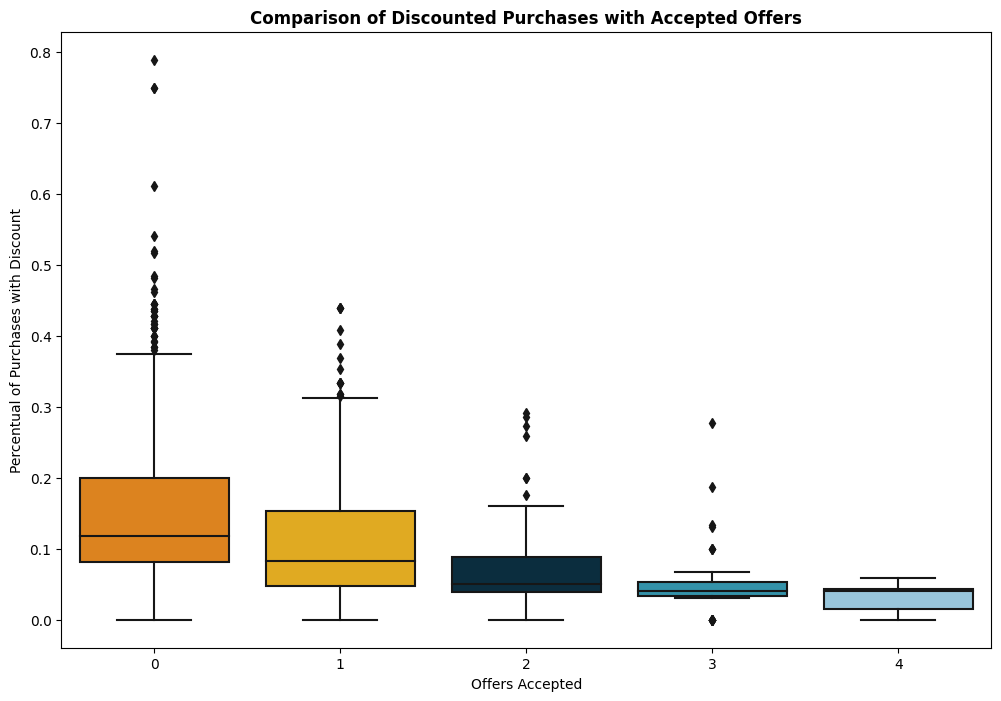

In [26]:
## Let's check the relationship between the "offers accepted", and the "percentual of purchases with discount"
df_imputed['accepted_sum'] = df_imputed['accepted_cpm3']+df_imputed['accepted_cpm4']+ df_imputed['accepted_cpm5'] + df_imputed['accepted_cpm1'] +df_imputed['accepted_cpm2']

# Define the colors
custom_palette = ["#fb8500", "#ffb703", "#023047", "#219ebc", "#8ecae6"]

# Create the box plot with custom colors
plt.figure(figsize=(12, 8))
plt.title('Comparison of Discounted Purchases with Accepted Offers', fontweight='bold')
sns.boxplot(data=df_imputed, x='accepted_sum', y='pct_purchases_with_discount', palette=custom_palette)
plt.xlabel('Offers Accepted')
plt.ylabel('Percentual of Purchases with Discount')


I won't use the "accepted~" features because they have an unexpected opposite correlation and lack clarity. The description suggests they represent whether a customer accepted an offer in a campaign, but it's unclear how they handle cases where customers didn't receive all offers or received more than five. Instead, I'll rely on "pct_purchases_with_discount" for a clearer and more straightforward insight.

## Dropping Unimportant Columns for Clustering
---

In preparation for clustering, we'll focus on retaining only the most relevant features to ensure our clusters are based on essential attributes.

In [27]:
df= df_imputed.drop(['num_web_visits_month','recency', 'conplain', 'response', 'customer_id','dt_customer',
              'year_birth','kid_home','teen_home','mnt_wines', 'mnt_fruits','mnt_meat', 'mnt_fish', 
              'mtn_sweet', 'mnt_gold', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
              'z_cost_contact','z_revenue', 'accepted_cpm3','accepted_cpm4', 'accepted_cpm5', 'accepted_cpm1',
              'accepted_cpm2', 'marital_status', 'accepted_sum'], axis = 1)

In [28]:
df.head()

,education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
0,Graduated,58138.0,3,1617,0.552876,29,0,0.103448,849,58,0
1,Graduated,46344.0,2,27,0.370370,9,2,0.222222,299,61,0
2,Graduated,71613.0,1,776,0.396907,24,0,0.041667,498,50,1
3,Graduated,26646.0,2,53,0.698113,12,1,0.166667,325,31,1
4,Postgraduate,58293.0,5,422,0.554502,19,1,0.263158,347,34,1


## Education's Impact on Financial Behavior
---

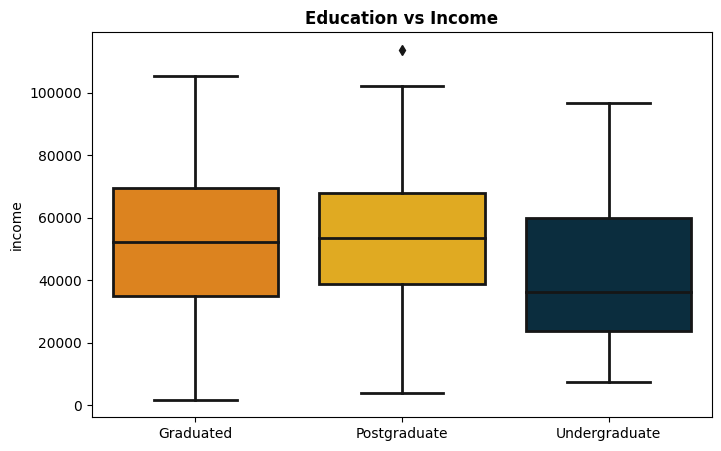

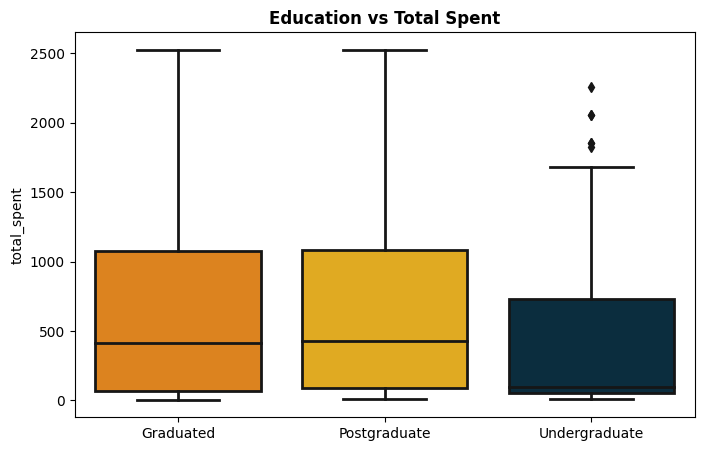

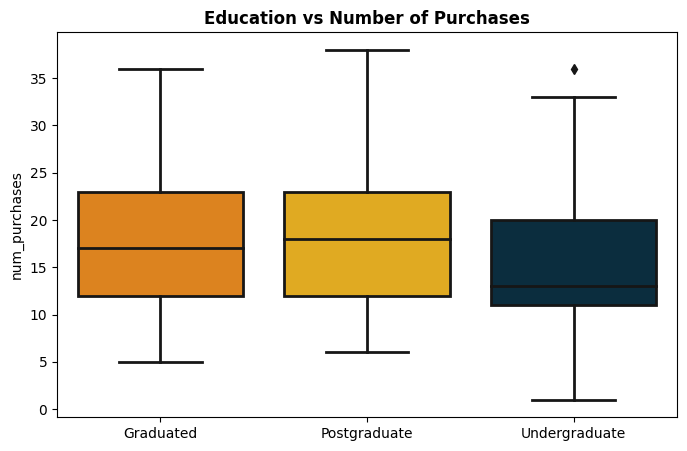

In [29]:
# Define the colors
custom_palette = ["#fb8500", "#ffb703", "#023047"]
# Purchase behavior vs Education
plt.figure(figsize=(8, 5))
plt.title("Education vs Income", fontweight='bold', fontsize=12)
sns.boxplot(y=df['income'], x=df['education'], palette=custom_palette, linewidth=2)
plt.xlabel("")
plt.show()

plt.figure(figsize=(8, 5))
plt.title("Education vs Total Spent", fontweight='bold', fontsize=12)
sns.boxplot(y=df['total_spent'], x=df['education'], palette=custom_palette, linewidth=2)
plt.xlabel("")
plt.show()

plt.figure(figsize=(8, 5))
plt.title("Education vs Number of Purchases", fontweight='bold', fontsize=12)
sns.boxplot(y=df['num_purchases'], x=df['education'], palette=custom_palette, linewidth=2)
plt.xlabel("")
plt.show()


Considering the purchasing patterns, it's reasonable to conclude that individuals with graduate and postgraduate degrees exhibit highly comparable behaviors. As a result, we will group them into a single category.

In [30]:
df["education"] = df["education"].replace({'Graduated':'Postgraduate'})
df['education'] = df['education'].replace({"Postgraduate": 1})
df['education'] = df['education'].replace({"Undergraduate": 0})
df.rename(columns={'education': 'high_education'}, inplace = True)

## Exploreatory Data Analysis (EDA)
---
Now, we'll explore our remaining variables, explore their distributions, and investigate their correlations.

In [31]:
# Summary Statistics of "df" dataset
df.describe()

,high_education,income,num_deals_purchases,total_spent,pct_essentials,num_purchases,num_children,pct_purchases_with_discount,days_since_enrollment,age,relationship
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,0.885599,51628.825945,2.319874,605.541050,0.420397,17.883356,0.951996,0.136173,539.777479,46.111261,0.644235
std,0.318369,20601.302353,1.895252,601.032228,0.193082,6.512647,0.751976,0.093847,202.248700,11.707430,0.478852
min,0.000000,1730.000000,0.000000,5.000000,0.027523,1.000000,0.000000,0.000000,186.000000,19.000000,0.000000
25%,1.000000,35416.000000,1.000000,69.000000,0.263311,12.000000,0.000000,0.066667,367.000000,38.000000,0.000000
50%,1.000000,51563.000000,2.000000,397.000000,0.427685,17.000000,1.000000,0.111111,542.000000,45.000000,1.000000
75%,1.000000,68118.000000,3.000000,1044.000000,0.569767,23.000000,1.000000,0.181818,715.000000,56.000000,1.000000
max,1.000000,113734.000000,15.000000,2525.000000,0.998844,38.000000,3.000000,0.789474,885.000000,75.000000,1.000000


In [32]:
## We will generate an additional column to assist in our data visualization, but it will be removed later.
df['age_group'] = df['age']//10*10

cat_columns = ['high_education','num_children', 'relationship', 'age_group']
num_columns = ['income', 'num_deals_purchases','total_spent','num_purchases', 
       'pct_purchases_with_discount', 'days_since_enrollment', 'pct_essentials']


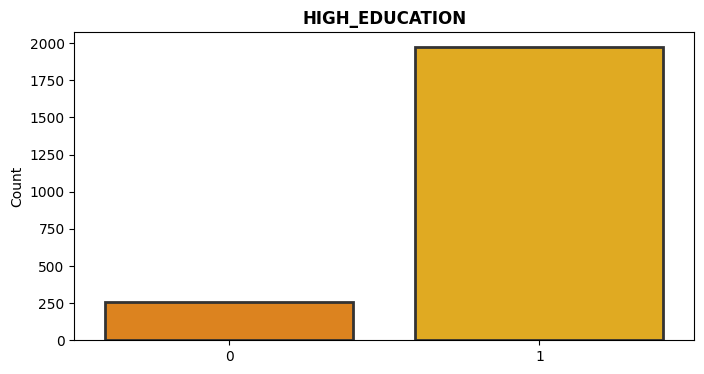

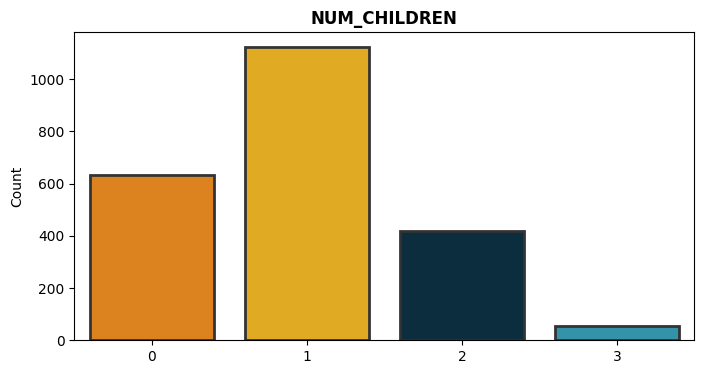

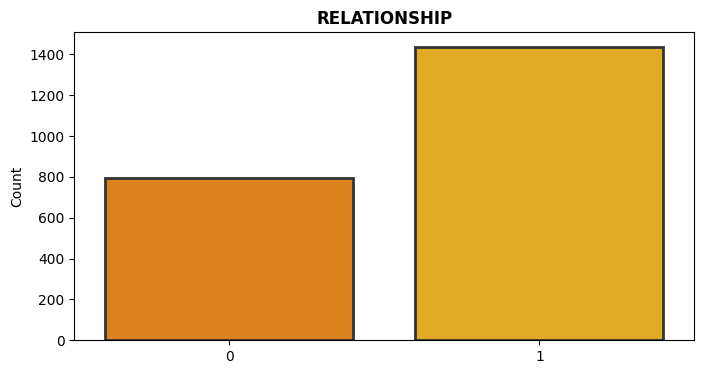

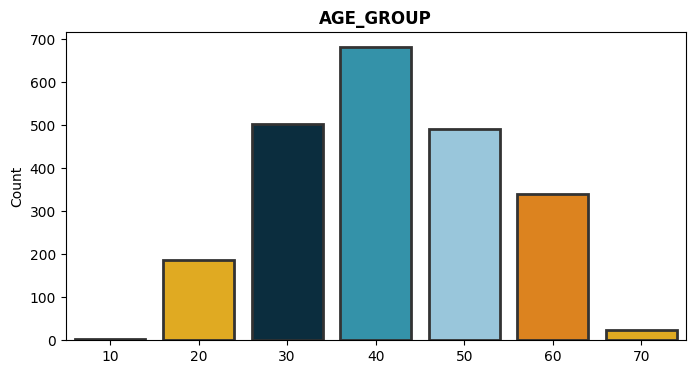

In [33]:
'''Categorical distributions (even though num_children and age_group are numerical variables,
for practical effects it makes a lot of sense to make their visualization as categorical)
'''
# Define the colors
custom_palette = ["#fb8500", "#ffb703", "#023047", "#219ebc", "#8ecae6"]
for cat in cat_columns:
    plt.figure(figsize = (8,4))
    plt.title(str.upper(cat), fontweight = 'bold')
    aux = df.groupby(cat).size().reset_index()#.rename({'pct_essentials':'count'}, axis = 1)
    ax = sns.barplot(x=cat, data=aux, y = 0, palette = custom_palette,linewidth=2, edgecolor=".2").set(ylabel="Count", xlabel = None)
    
    plt.show()

As it is shown in the plots, most of our customers:
  - Are in a relationship
  - Have a high level of education (graduated or more)
  - Have one child
  - Are between 30 and 60 years old

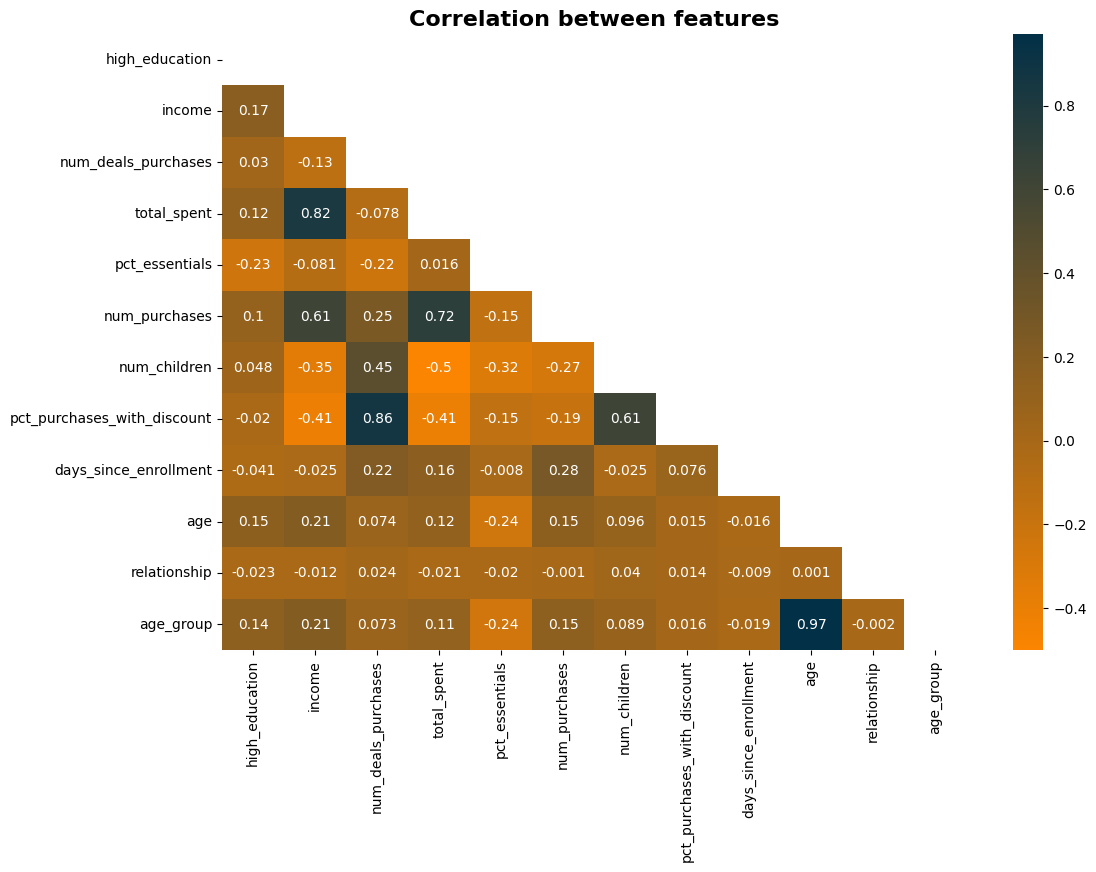

In [34]:
import numpy as np
import matplotlib.colors as mcolors

# Define your custom colormap with the specified colors
custom_colors = ['#fb8500', '#023047']
custom_cmap = mcolors.LinearSegmentedColormap.from_list("CustomColors", custom_colors)

corr = df.corr()

# Getting the Upper Triangle of the correlation matrix
matrix = np.triu(corr)

fig = plt.figure(figsize=(12, 8))
plt.title('Correlation between features', fontsize=16, fontweight='bold')
sns.heatmap(round(df.corr(), 3), annot=True, cmap=custom_cmap, mask=matrix);


Observing the correlation matrix, we notice several variables with significant correlations. Now, let's delve deeper into them.

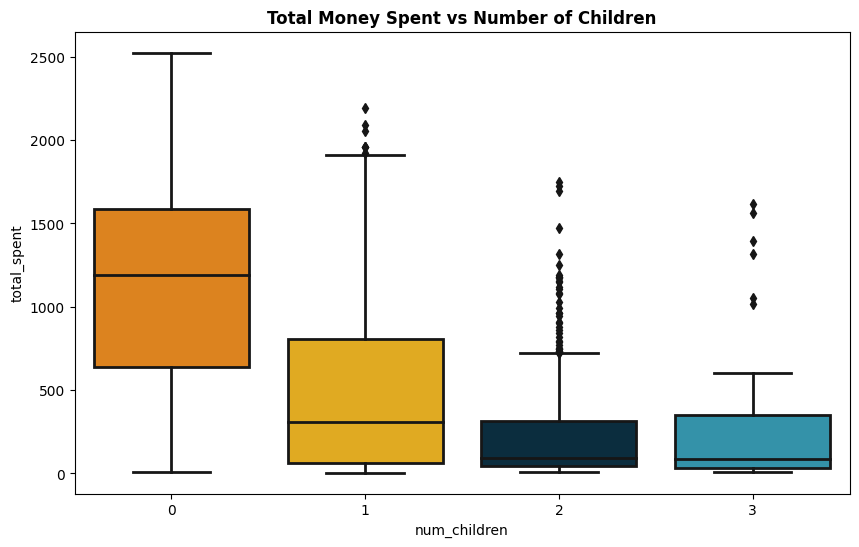

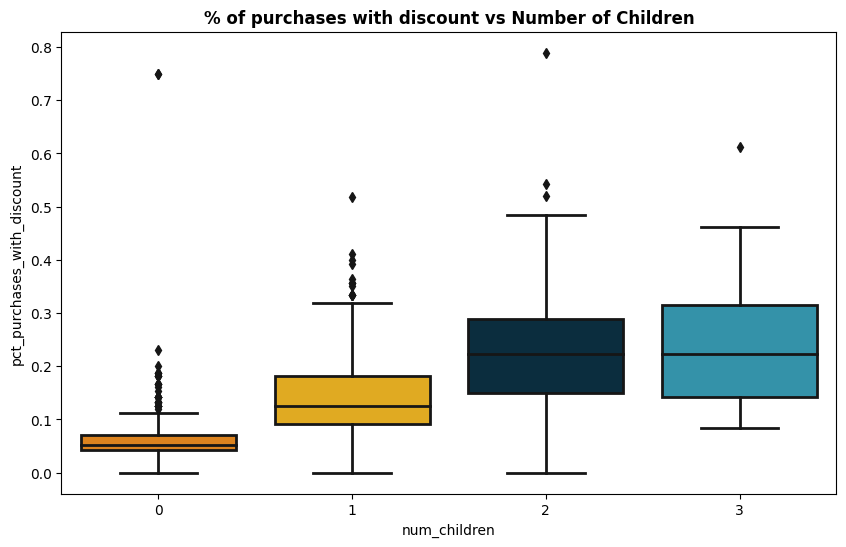

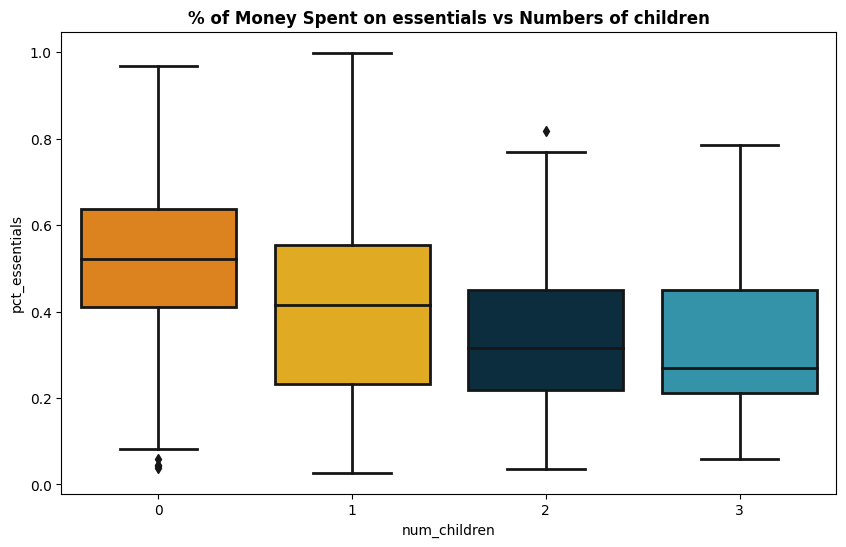

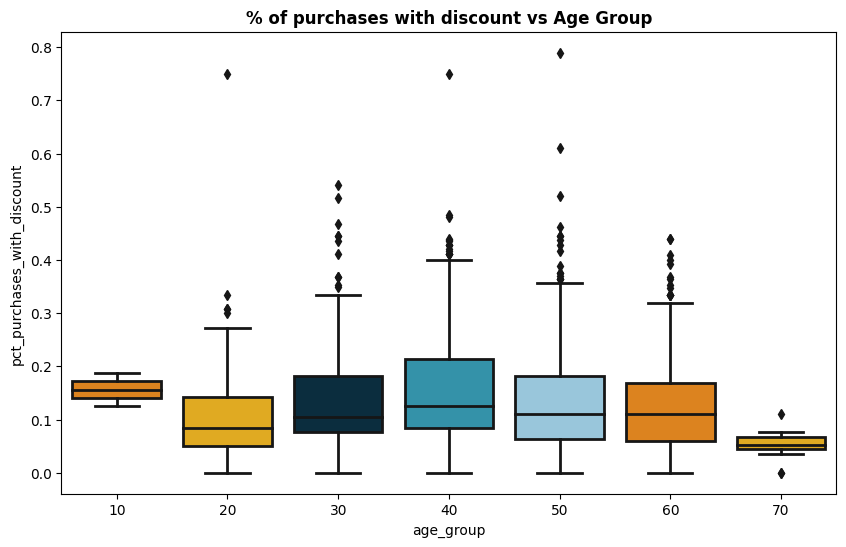

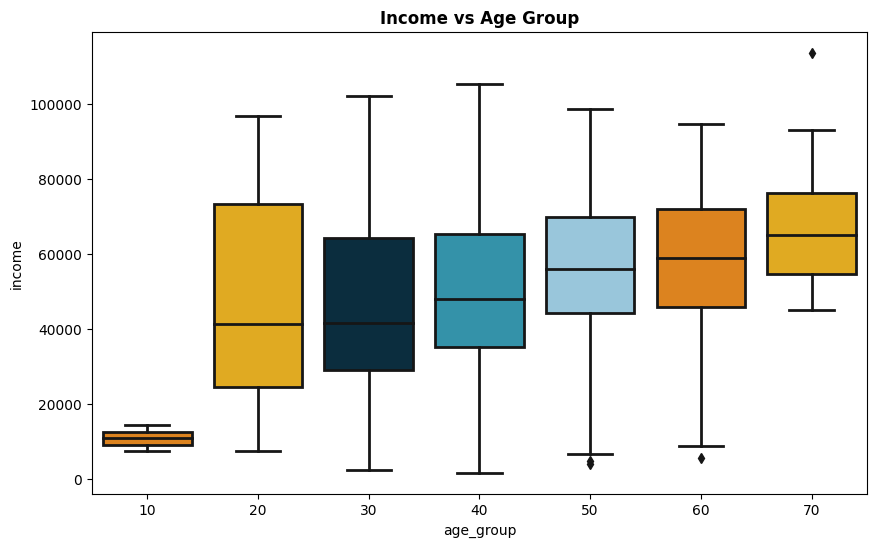

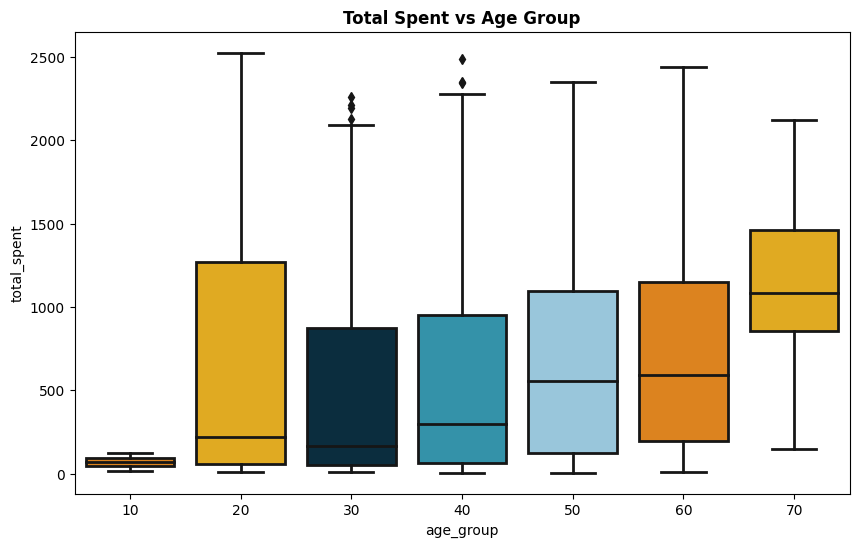

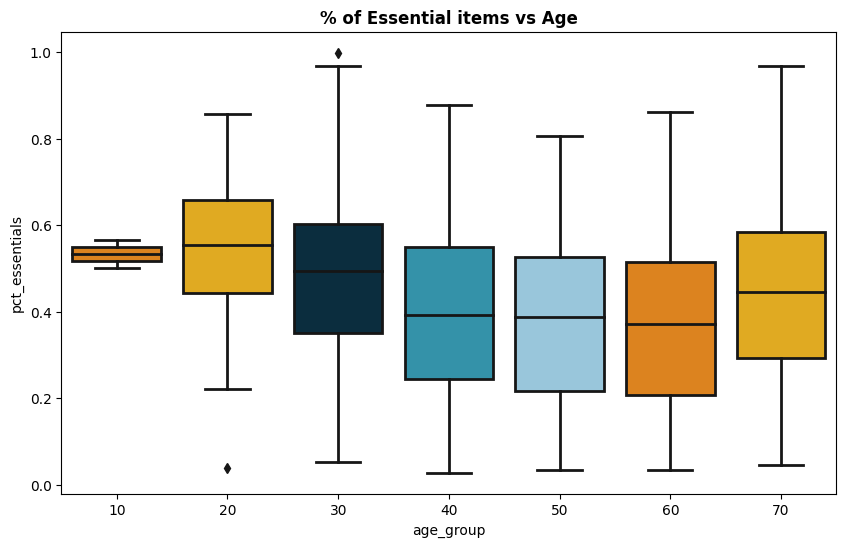

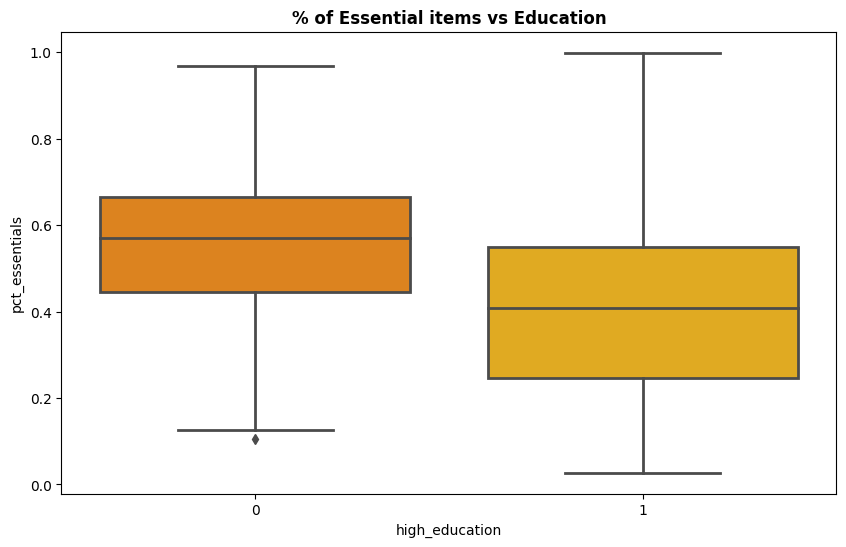

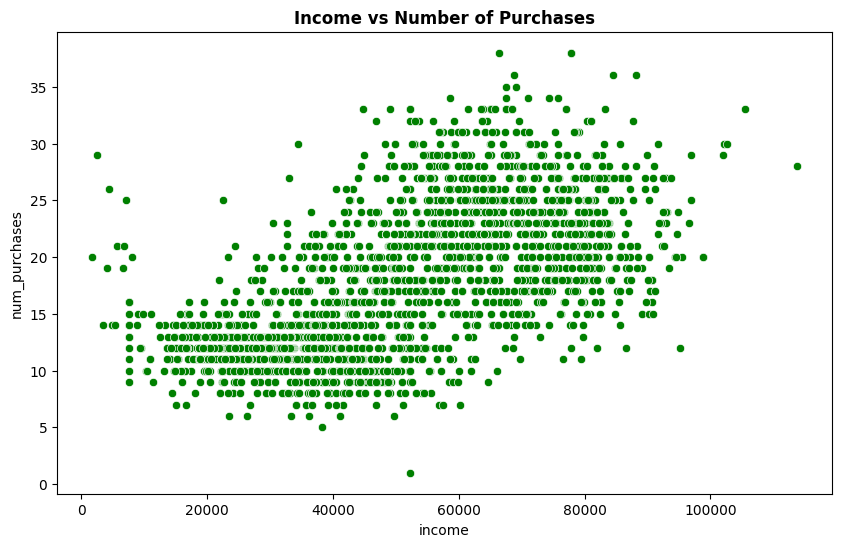

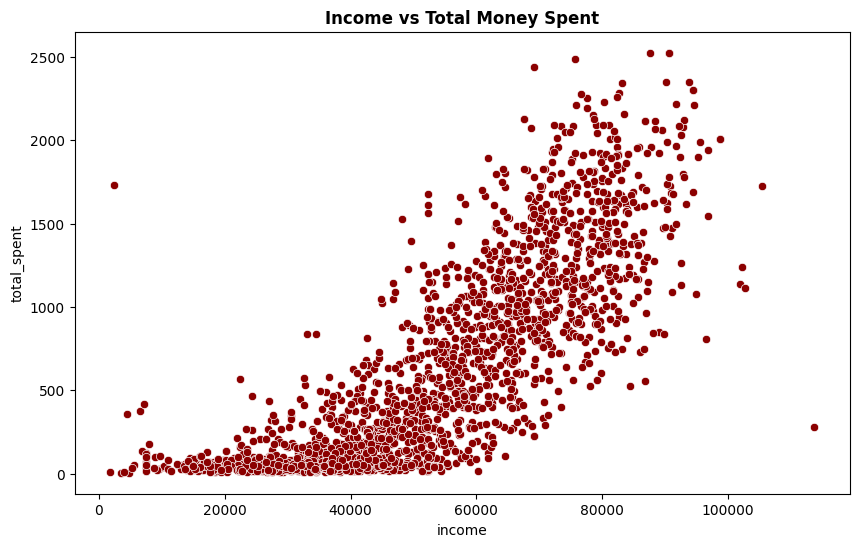

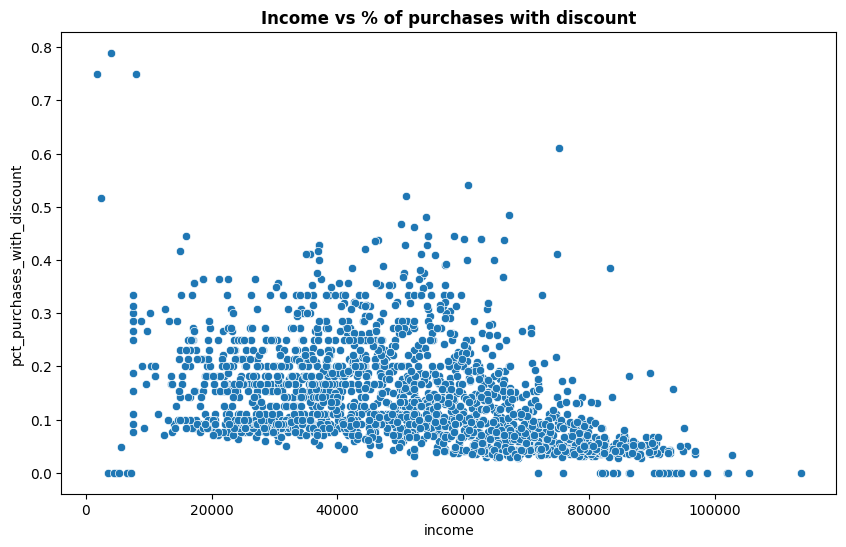

In [35]:
# Define the colors
custom_palette = ["#fb8500", "#ffb703", "#023047", "#219ebc", "#8ecae6"]
plt.figure(figsize = (10,6))
plt.title("Total Money Spent vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'num_children', palette = custom_palette, linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Number of Children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'num_children',palette = custom_palette, linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Money Spent on essentials vs Numbers of children", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'num_children',palette = custom_palette, linewidth = 2) ### esquisito
plt.show()


plt.figure(figsize = (10,6))
plt.title("% of purchases with discount vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_purchases_with_discount', x = 'age_group',palette = custom_palette, linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'income', x = 'age_group',palette = custom_palette, linewidth = 2)
plt.show()


plt.figure(figsize = (10,6))
plt.title("Total Spent vs Age Group", fontweight = 'bold')
sns.boxplot(data = df, y = 'total_spent', x = 'age_group',palette = custom_palette, linewidth = 2)
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Age", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'age_group',palette = custom_palette, linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("% of Essential items vs Education", fontweight = 'bold')
sns.boxplot(data = df, y = 'pct_essentials', x = 'high_education',palette = custom_palette, linewidth = 2)# interessante
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Number of Purchases", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'num_purchases', color = 'green')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs Total Money Spent", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'total_spent', color = 'darkred')
plt.show()

plt.figure(figsize = (10,6))
plt.title("Income vs % of purchases with discount", fontweight = 'bold')
sns.scatterplot(data = df, x = 'income', y = 'pct_purchases_with_discount')
plt.show()
